# Import Library

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [571]:
dataset = pd.read_csv('data_bike_sharing.csv')

In [573]:
dataset.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


# Feature Selection

In [576]:
#Remove the dteday column because it makes us cannot do correlation matrix
dataset.drop('dteday', axis=1, inplace=True)

#Remove cnt column, because it is just the addition of casual and registered
dataset.drop('cnt', axis=1, inplace=True)
#dataset.drop('casual', axis=1, inplace=True)
#dataset.drop('registered', axis=1, inplace=True)

In [578]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered
hum,1.000000,0.415240,-0.011946,0.145679,-0.051782,-0.068842,-0.279156,-0.345498,-0.269805
weathersit,0.415240,1.000000,-0.022009,-0.017910,-0.105332,-0.103030,-0.018132,-0.148261,-0.121773
holiday,-0.011946,-0.022009,1.000000,-0.006507,-0.026845,-0.023884,-0.000848,0.036796,-0.048350
season,0.145679,-0.017910,-0.006507,1.000000,0.326234,0.319737,-0.011831,0.132017,0.179896
atemp,-0.051782,-0.105332,-0.026845,0.326234,1.000000,0.987352,0.140835,0.452337,0.330228
temp,-0.068842,-0.103030,-0.023884,0.319737,0.987352,1.000000,0.143867,0.456828,0.331619
hr,-0.279156,-0.018132,-0.000848,-0.011831,0.140835,0.143867,1.000000,0.303310,0.374755
casual,-0.345498,-0.148261,0.036796,0.132017,0.452337,0.456828,0.303310,1.000000,0.506877
registered,-0.269805,-0.121773,-0.048350,0.179896,0.330228,0.331619,0.374755,0.506877,1.000000


In [580]:
#We can see that atemp and temp has Multicollinearity, so we will remove 1 of it
dataset.drop('atemp', axis=1, inplace=True)

In [582]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,weathersit,holiday,season,temp,hr,casual,registered
hum,1.000000,0.415240,-0.011946,0.145679,-0.068842,-0.279156,-0.345498,-0.269805
weathersit,0.415240,1.000000,-0.022009,-0.017910,-0.103030,-0.018132,-0.148261,-0.121773
holiday,-0.011946,-0.022009,1.000000,-0.006507,-0.023884,-0.000848,0.036796,-0.048350
season,0.145679,-0.017910,-0.006507,1.000000,0.319737,-0.011831,0.132017,0.179896
temp,-0.068842,-0.103030,-0.023884,0.319737,1.000000,0.143867,0.456828,0.331619
hr,-0.279156,-0.018132,-0.000848,-0.011831,0.143867,1.000000,0.303310,0.374755
casual,-0.345498,-0.148261,0.036796,0.132017,0.456828,0.303310,1.000000,0.506877
registered,-0.269805,-0.121773,-0.048350,0.179896,0.331619,0.374755,0.506877,1.000000


In [584]:
#We can see that humidty and weathersit has a correlation between each other, so we will remove the weather sit
dataset.drop('weathersit', axis=1, inplace=True)

In [586]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,holiday,season,temp,hr,casual,registered
hum,1.000000,-0.011946,0.145679,-0.068842,-0.279156,-0.345498,-0.269805
holiday,-0.011946,1.000000,-0.006507,-0.023884,-0.000848,0.036796,-0.048350
season,0.145679,-0.006507,1.000000,0.319737,-0.011831,0.132017,0.179896
temp,-0.068842,-0.023884,0.319737,1.000000,0.143867,0.456828,0.331619
hr,-0.279156,-0.000848,-0.011831,0.143867,1.000000,0.303310,0.374755
casual,-0.345498,0.036796,0.132017,0.456828,0.303310,1.000000,0.506877
registered,-0.269805,-0.048350,0.179896,0.331619,0.374755,0.506877,1.000000


In [588]:
#Holiday has a very weak correlation with the casual and registered, so it is better to remove it to make the model more simple
dataset.drop('holiday', axis=1, inplace=True)

In [590]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,season,temp,hr,casual,registered
hum,1.000000,0.145679,-0.068842,-0.279156,-0.345498,-0.269805
season,0.145679,1.000000,0.319737,-0.011831,0.132017,0.179896
temp,-0.068842,0.319737,1.000000,0.143867,0.456828,0.331619
hr,-0.279156,-0.011831,0.143867,1.000000,0.303310,0.374755
casual,-0.345498,0.132017,0.456828,0.303310,1.000000,0.506877
registered,-0.269805,0.179896,0.331619,0.374755,0.506877,1.000000


# One hot encoding and Feature engineering

Create Feature Engineering and one hot encoding for hr column

In [594]:
#dawn = 00-05
#morning = 06-11
#afternoon = 12-17
#evening = 18-23

def hr_to_timecat(x):
  if x >= 18:
    return 'evening'
  elif x>= 12:
    return 'afternoon'
  elif x>= 6:
    return 'morning'
  else:
    return 'dawn'

dataset['time_category'] = dataset['hr'].apply(hr_to_timecat)
one_hot_time = pd.get_dummies(dataset['time_category'])
dataset = pd.concat([dataset, one_hot_time], axis=1)
dataset.drop('time_category', axis=1, inplace=True)

In [596]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,season,temp,hr,casual,registered,afternoon,dawn,evening,morning
hum,1.000000,0.145679,-0.068842,-0.279156,-0.345498,-0.269805,-0.365185,0.277500,-0.048325,0.136154
season,0.145679,1.000000,0.319737,-0.011831,0.132017,0.179896,0.005418,0.013056,-0.012722,-0.005695
temp,-0.068842,0.319737,1.000000,0.143867,0.456828,0.331619,0.181288,-0.138012,0.028427,-0.071776
hr,-0.279156,-0.011831,0.143867,1.000000,0.303310,0.374755,0.248549,-0.749826,0.750980,-0.251708
casual,-0.345498,0.132017,0.456828,0.303310,1.000000,0.506877,0.444852,-0.365291,-0.003913,-0.075916
registered,-0.269805,0.179896,0.331619,0.374755,0.506877,1.000000,0.266529,-0.506691,0.138990,0.100034
afternoon,-0.365185,0.005418,0.181288,0.248549,0.444852,0.266529,1.000000,-0.331472,-0.333734,-0.333734
dawn,0.277500,0.013056,-0.138012,-0.749826,-0.365291,-0.506691,-0.331472,1.000000,-0.332928,-0.332928
evening,-0.048325,-0.012722,0.028427,0.750980,-0.003913,0.138990,-0.333734,-0.332928,1.000000,-0.335199
morning,0.136154,-0.005695,-0.071776,-0.251708,-0.075916,0.100034,-0.333734,-0.332928,-0.335199,1.000000


In [598]:
#We can see now the one hot encoding of time of the day has better correlation to target variable
#So we will remove hr column, and remove morning column to fix the dummy variable trap
#Why morning ? because morning has the weakest correlation of all
dataset.drop('hr', axis=1, inplace=True)
dataset.drop('morning', axis=1, inplace=True)

In [600]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,season,temp,casual,registered,afternoon,dawn,evening
hum,1.000000,0.145679,-0.068842,-0.345498,-0.269805,-0.365185,0.277500,-0.048325
season,0.145679,1.000000,0.319737,0.132017,0.179896,0.005418,0.013056,-0.012722
temp,-0.068842,0.319737,1.000000,0.456828,0.331619,0.181288,-0.138012,0.028427
casual,-0.345498,0.132017,0.456828,1.000000,0.506877,0.444852,-0.365291,-0.003913
registered,-0.269805,0.179896,0.331619,0.506877,1.000000,0.266529,-0.506691,0.138990
afternoon,-0.365185,0.005418,0.181288,0.444852,0.266529,1.000000,-0.331472,-0.333734
dawn,0.277500,0.013056,-0.138012,-0.365291,-0.506691,-0.331472,1.000000,-0.332928
evening,-0.048325,-0.012722,0.028427,-0.003913,0.138990,-0.333734,-0.332928,1.000000


Create one hot encoding column for season

In [603]:
one_hot_season = pd.get_dummies(dataset['season'], prefix = 'season')
dataset = pd.concat([dataset, one_hot_season], axis=1)
dataset.drop('season', axis=1, inplace=True)

In [605]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,temp,casual,registered,afternoon,dawn,evening,season_1,season_2,season_3,season_4
hum,1.000000,-0.068842,-0.345498,-0.269805,-0.365185,0.277500,-0.048325,-0.135524,0.006346,0.020607,0.109761
temp,-0.068842,1.000000,0.456828,0.331619,0.181288,-0.138012,0.028427,-0.590590,0.149910,0.641832,-0.215070
casual,-0.345498,0.456828,1.000000,0.506877,0.444852,-0.365291,-0.003913,-0.253270,0.124617,0.168633,-0.043936
registered,-0.269805,0.331619,0.506877,1.000000,0.266529,-0.506691,0.138990,-0.215911,0.031666,0.121682,0.061347
afternoon,-0.365185,0.181288,0.444852,0.266529,1.000000,-0.331472,-0.333734,-0.003055,0.000145,-0.004918,0.008017
dawn,0.277500,-0.138012,-0.365291,-0.506691,-0.331472,1.000000,-0.332928,-0.010219,0.000487,-0.003682,0.013662
evening,-0.048325,0.028427,-0.003913,0.138990,-0.333734,-0.332928,1.000000,0.009687,-0.002060,0.007528,-0.015480
season_1,-0.135524,-0.590590,-0.253270,-0.215911,-0.003055,-0.010219,0.009687,1.000000,-0.334383,-0.341299,-0.321645
season_2,0.006346,0.149910,0.124617,0.031666,0.000145,0.000487,-0.002060,-0.334383,1.000000,-0.345130,-0.325255
season_3,0.020607,0.641832,0.168633,0.121682,-0.004918,-0.003682,0.007528,-0.341299,-0.345130,1.000000,-0.331982


In [607]:
#From here we can see that seasons are also have a weak correlation to the casual and afternoon
#But we will still use it
#We will remove season 4 or Fall season to fix dummy variable trap
dataset.drop('season_4', axis=1, inplace=True)

In [609]:
correlation_matrix = dataset.corr()
correlation_matrix

,hum,temp,casual,registered,afternoon,dawn,evening,season_1,season_2,season_3
hum,1.000000,-0.068842,-0.345498,-0.269805,-0.365185,0.277500,-0.048325,-0.135524,0.006346,0.020607
temp,-0.068842,1.000000,0.456828,0.331619,0.181288,-0.138012,0.028427,-0.590590,0.149910,0.641832
casual,-0.345498,0.456828,1.000000,0.506877,0.444852,-0.365291,-0.003913,-0.253270,0.124617,0.168633
registered,-0.269805,0.331619,0.506877,1.000000,0.266529,-0.506691,0.138990,-0.215911,0.031666,0.121682
afternoon,-0.365185,0.181288,0.444852,0.266529,1.000000,-0.331472,-0.333734,-0.003055,0.000145,-0.004918
dawn,0.277500,-0.138012,-0.365291,-0.506691,-0.331472,1.000000,-0.332928,-0.010219,0.000487,-0.003682
evening,-0.048325,0.028427,-0.003913,0.138990,-0.333734,-0.332928,1.000000,0.009687,-0.002060,0.007528
season_1,-0.135524,-0.590590,-0.253270,-0.215911,-0.003055,-0.010219,0.009687,1.000000,-0.334383,-0.341299
season_2,0.006346,0.149910,0.124617,0.031666,0.000145,0.000487,-0.002060,-0.334383,1.000000,-0.345130
season_3,0.020607,0.641832,0.168633,0.121682,-0.004918,-0.003682,0.007528,-0.341299,-0.345130,1.000000


# Data Cleaning

Arrange the columns

In [613]:
dataset.columns

Index(['hum', 'temp', 'casual', 'registered', 'afternoon', 'dawn', 'evening',
       'season_1', 'season_2', 'season_3'],
      dtype='object')

In [615]:
#Arrange the column
dataset = dataset[['hum', 'temp','afternoon', 'dawn', 'evening',
       'season_1', 'season_2', 'season_3','casual', 'registered']]

In [617]:
dataset

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3,casual,registered
0,0.62,0.36,True,False,False,False,False,False,24,226
1,0.64,0.54,False,True,False,False,True,False,2,16
2,0.53,0.62,False,False,True,False,True,False,17,90
3,0.87,0.36,False,False,False,False,True,False,19,126
4,0.55,0.76,False,False,True,False,False,True,99,758
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,0.24,False,False,False,True,False,False,14,243
12161,0.62,0.78,False,True,False,False,False,True,39,63
12162,0.60,0.24,False,True,False,True,False,False,0,6
12163,0.77,0.42,False,True,False,False,True,False,14,55


Outlier Removal

In [620]:
#Casual Value Outlier Removal
Q1 = dataset['casual'].quantile(0.25)
Q3 = dataset['casual'].quantile(0.75)
IQR = Q3 - Q1

IQR_cas_lower_bound = Q1 - 1.5 * IQR
IQR_cas_upper_bound = Q3 + 1.5 * IQR

outlier = dataset[(dataset['casual']<IQR_cas_lower_bound)|(dataset['casual']>IQR_cas_upper_bound)]
dataset = dataset.drop(outlier.index)

In [622]:
dataset

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3,casual,registered
0,0.62,0.36,True,False,False,False,False,False,24,226
1,0.64,0.54,False,True,False,False,True,False,2,16
2,0.53,0.62,False,False,True,False,True,False,17,90
3,0.87,0.36,False,False,False,False,True,False,19,126
4,0.55,0.76,False,False,True,False,False,True,99,758
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,0.24,False,False,False,True,False,False,14,243
12161,0.62,0.78,False,True,False,False,False,True,39,63
12162,0.60,0.24,False,True,False,True,False,False,0,6
12163,0.77,0.42,False,True,False,False,True,False,14,55


In [624]:
dataset.corr()

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3,casual,registered
hum,1.000000,-0.024325,-0.339427,0.260620,-0.066876,-0.169226,0.025252,0.030426,-0.352176,-0.235167
temp,-0.024325,1.000000,0.134164,-0.107681,0.043218,-0.589716,0.148854,0.652888,0.526086,0.300093
afternoon,-0.339427,0.134164,1.000000,-0.316316,-0.310109,0.035174,-0.019363,-0.019948,0.390480,0.219420
dawn,0.260620,-0.107681,-0.316316,1.000000,-0.357285,-0.030809,0.013438,0.006200,-0.452176,-0.498217
evening,-0.066876,0.043218,-0.310109,-0.357285,1.000000,0.000439,0.000971,0.008127,0.122047,0.166908
season_1,-0.169226,-0.589716,0.035174,-0.030809,0.000439,1.000000,-0.339179,-0.348125,-0.287249,-0.196684
season_2,0.025252,0.148854,-0.019363,0.013438,0.000971,-0.339179,1.000000,-0.330377,0.111072,0.015920
season_3,0.030426,0.652888,-0.019948,0.006200,0.008127,-0.348125,-0.330377,1.000000,0.251064,0.118779
casual,-0.352176,0.526086,0.390480,-0.452176,0.122047,-0.287249,0.111072,0.251064,1.000000,0.575452
registered,-0.235167,0.300093,0.219420,-0.498217,0.166908,-0.196684,0.015920,0.118779,0.575452,1.000000


In [626]:
#Registered Value Outlier Removal
Q1 = dataset['registered'].quantile(0.25)
Q3 = dataset['registered'].quantile(0.75)
IQR = Q3 - Q1

IQR_cas_lower_bound = Q1 - 1.5 * IQR
IQR_cas_upper_bound = Q3 + 1.5 * IQR

outlier = dataset[(dataset['registered']<IQR_cas_lower_bound)|(dataset['registered']>IQR_cas_upper_bound)]
dataset = dataset.drop(outlier.index)

In [628]:
dataset

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3,casual,registered
0,0.62,0.36,True,False,False,False,False,False,24,226
1,0.64,0.54,False,True,False,False,True,False,2,16
2,0.53,0.62,False,False,True,False,True,False,17,90
3,0.87,0.36,False,False,False,False,True,False,19,126
5,0.72,0.46,False,True,False,False,False,False,6,39
...,...,...,...,...,...,...,...,...,...,...
12159,0.54,0.72,False,False,False,False,False,True,41,296
12160,0.75,0.24,False,False,False,True,False,False,14,243
12161,0.62,0.78,False,True,False,False,False,True,39,63
12162,0.60,0.24,False,True,False,True,False,False,0,6


In [630]:
dataset.corr()

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3,casual,registered
hum,1.000000,-0.003709,-0.337214,0.258434,-0.053763,-0.183896,0.030997,0.040824,-0.337181,-0.261961
temp,-0.003709,1.000000,0.126036,-0.091758,0.028518,-0.595025,0.156293,0.654053,0.504898,0.299463
afternoon,-0.337214,0.126036,1.000000,-0.323485,-0.301044,0.043478,-0.019623,-0.024537,0.393658,0.271070
dawn,0.258434,-0.091758,-0.323485,1.000000,-0.366075,-0.046027,0.015410,0.015944,-0.450037,-0.582602
evening,-0.053763,0.028518,-0.301044,-0.366075,1.000000,0.007562,0.000039,0.002808,0.097815,0.201411
season_1,-0.183896,-0.595025,0.043478,-0.046027,0.007562,1.000000,-0.347213,-0.351184,-0.276174,-0.182366
season_2,0.030997,0.156293,-0.019623,0.015410,0.000039,-0.347213,1.000000,-0.323844,0.114492,0.016390
season_3,0.040824,0.654053,-0.024537,0.015944,0.002808,-0.351184,-0.323844,1.000000,0.237209,0.108099
casual,-0.337181,0.504898,0.393658,-0.450037,0.097815,-0.276174,0.114492,0.237209,1.000000,0.599855
registered,-0.261961,0.299463,0.271070,-0.582602,0.201411,-0.182366,0.016390,0.108099,0.599855,1.000000


# Seperate Predictor and Target Variable

In [632]:
dataset

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3,casual,registered
0,0.62,0.36,True,False,False,False,False,False,24,226
1,0.64,0.54,False,True,False,False,True,False,2,16
2,0.53,0.62,False,False,True,False,True,False,17,90
3,0.87,0.36,False,False,False,False,True,False,19,126
5,0.72,0.46,False,True,False,False,False,False,6,39
...,...,...,...,...,...,...,...,...,...,...
12159,0.54,0.72,False,False,False,False,False,True,41,296
12160,0.75,0.24,False,False,False,True,False,False,14,243
12161,0.62,0.78,False,True,False,False,False,True,39,63
12162,0.60,0.24,False,True,False,True,False,False,0,6


In [648]:
X = dataset.iloc[:,:-2]
y_cas = dataset.iloc[:,-2]
y_reg = dataset.iloc[:,-1]

In [650]:
X

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3
0,0.62,0.36,True,False,False,False,False,False
1,0.64,0.54,False,True,False,False,True,False
2,0.53,0.62,False,False,True,False,True,False
3,0.87,0.36,False,False,False,False,True,False
5,0.72,0.46,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...
12159,0.54,0.72,False,False,False,False,False,True
12160,0.75,0.24,False,False,False,True,False,False
12161,0.62,0.78,False,True,False,False,False,True
12162,0.60,0.24,False,True,False,True,False,False


In [656]:
y_cas

0        24
1         2
2        17
3        19
5         6
         ..
12159    41
12160    14
12161    39
12162     0
12163    14
Name: casual, Length: 10708, dtype: int64

In [658]:
y_reg

0        226
1         16
2         90
3        126
5         39
        ... 
12159    296
12160    243
12161     63
12162      6
12163     55
Name: registered, Length: 10708, dtype: int64

# Seperate Train and Test Set

In [660]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_cas, y_test_cas = train_test_split(X, y_cas, test_size=0.2, random_state=0)
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=0)

In [662]:
X_train

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3
8711,0.73,0.60,False,False,False,False,False,False
6109,0.72,0.50,False,False,True,False,False,False
3162,0.70,0.72,False,False,False,False,False,True
11147,0.72,0.44,False,False,True,False,False,False
3277,0.93,0.24,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
10491,0.81,0.36,False,True,False,False,False,False
5516,0.94,0.48,False,True,False,False,False,False
3702,0.78,0.62,False,False,True,False,False,True
11192,0.45,0.52,True,False,False,False,False,False


In [664]:
y_train_cas

8711     43
6109     27
3162     21
11147    25
3277      7
         ..
10491     0
5516      0
3702      6
11192    21
3092     23
Name: casual, Length: 8566, dtype: int64

In [666]:
y_train_reg

8711     125
6109     259
3162     141
11147    178
3277     275
        ... 
10491      9
5516       8
3702      50
11192    130
3092     112
Name: registered, Length: 8566, dtype: int64

In [668]:
X_test

,hum,temp,afternoon,dawn,evening,season_1,season_2,season_3
11740,0.81,0.34,False,False,False,False,True,False
5892,0.65,0.24,False,False,False,False,False,False
6452,0.49,0.84,False,False,False,False,True,False
3908,0.76,0.40,False,False,False,False,True,False
10582,0.89,0.64,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
12139,0.59,0.50,False,False,True,False,False,False
7368,0.46,0.34,True,False,False,False,True,False
9328,0.70,0.24,False,False,True,False,False,False
6320,0.70,0.26,False,True,False,False,False,False


In [670]:
y_test_cas

11740     3
5892     10
6452     20
3908      4
10582    44
         ..
12139    35
7368     42
9328      3
6320      0
3278     50
Name: casual, Length: 2142, dtype: int64

In [672]:
y_test_reg

11740     25
5892     405
6452     148
3908     132
10582    161
        ... 
12139    161
7368     125
9328      58
6320       2
3278     125
Name: registered, Length: 2142, dtype: int64

# Model Creation

For predicting Casual

In [674]:
#Create a list of multiple model

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

linear_regression = LinearRegression()
SVR = SVR(kernel='rbf')
KNR = KNeighborsRegressor(n_neighbors=2)
Random_ForestR = RandomForestRegressor()

model_list_cas = [linear_regression, SVR, KNR, Random_ForestR]

In [676]:
#Do model testing for predicting casual

for x in model_list_cas:
    x.fit(X_train, y_train_cas)
    y_pred = x.predict(X_train)
    mae = mean_absolute_error(y_train_cas, y_pred)
    print(x, mae)

LinearRegression() 13.839944516053032
SVR() 11.466327872482434
KNeighborsRegressor(n_neighbors=2) 8.975017511090357
RandomForestRegressor() 7.685021162455738


In [678]:
#Do model testing for predicting registered

for x in model_list_cas:
    x.fit(X_train, y_train_reg)
    y_pred = x.predict(X_train)
    mae = mean_absolute_error(y_train_reg, y_pred)
    print(x, mae)

LinearRegression() 57.6757113969705
SVR() 53.83415856580973
KNeighborsRegressor(n_neighbors=2) 44.02813448517394
RandomForestRegressor() 37.71324922154606


In [514]:
#From here we can see that randomforestregressor is better than everyone else, so we will use it

In [680]:
Random_ForestR_cas = RandomForestRegressor()
Random_ForestR_cas.fit(X_train, y_train_cas)

RandomForestRegressor()

In [682]:
Random_ForestR_reg = RandomForestRegressor()
Random_ForestR_reg.fit(X_train, y_train_reg)

RandomForestRegressor()

# Model Validation

In [686]:
y_test_cas_predicted = Random_ForestR_cas.predict(X_test)
y_test_cas_predicted = np.round(y_test_cas_predicted, decimals=0)

mae = mean_absolute_error(y_test_cas, y_test_cas_predicted)
mae

11.877217553688142

In [690]:
y_test_reg_predicted = Random_ForestR_reg.predict(X_test)
y_test_reg_predicted = np.round(y_test_reg_predicted, decimals=0)

mae = mean_absolute_error(y_test_reg, y_test_reg_predicted)
mae

58.76937441643324

In [720]:
actual_vs_pred_cas = pd.DataFrame({'actual_cas': y_test_cas, 'predicted_cas': y_test_cas_predicted})
actual_vs_pred_cas['difference'] = actual_vs_pred_cas['actual_cas']-actual_vs_pred_cas['predicted_cas']
actual_vs_pred_cas

,actual_cas,predicted_cas,difference
11740,3,14.0,-11.0
5892,10,2.0,8.0
6452,20,45.0,-25.0
3908,4,18.0,-14.0
10582,44,30.0,14.0
...,...,...,...
12139,35,26.0,9.0
7368,42,31.0,11.0
9328,3,6.0,-3.0
6320,0,4.0,-4.0


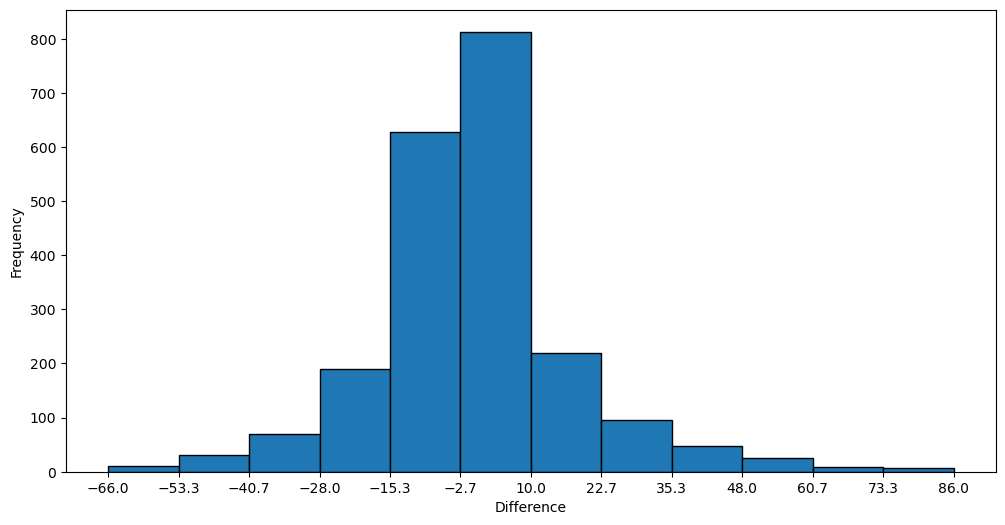

In [779]:
plt.figure(figsize=(12, 6))
actual_vs_pred_cas['difference'].plot(kind='hist', bins=12, edgecolor='black')
counts, bin_edges = np.histogram(actual_vs_pred_cas['difference'], bins=12)

plt.xticks(bin_edges)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

In [734]:
actual_vs_pred_reg = pd.DataFrame({'actual_reg': y_test_reg, 'predicted_reg': y_test_reg_predicted})
actual_vs_pred_reg['difference'] = actual_vs_pred_reg['actual_reg']-actual_vs_pred_reg['predicted_reg']
actual_vs_pred_reg

,actual_reg,predicted_reg,difference
11740,25,91.0,-66.0
5892,405,93.0,312.0
6452,148,129.0,19.0
3908,132,102.0,30.0
10582,161,234.0,-73.0
...,...,...,...
12139,161,232.0,-71.0
7368,125,118.0,7.0
9328,58,86.0,-28.0
6320,2,36.0,-34.0


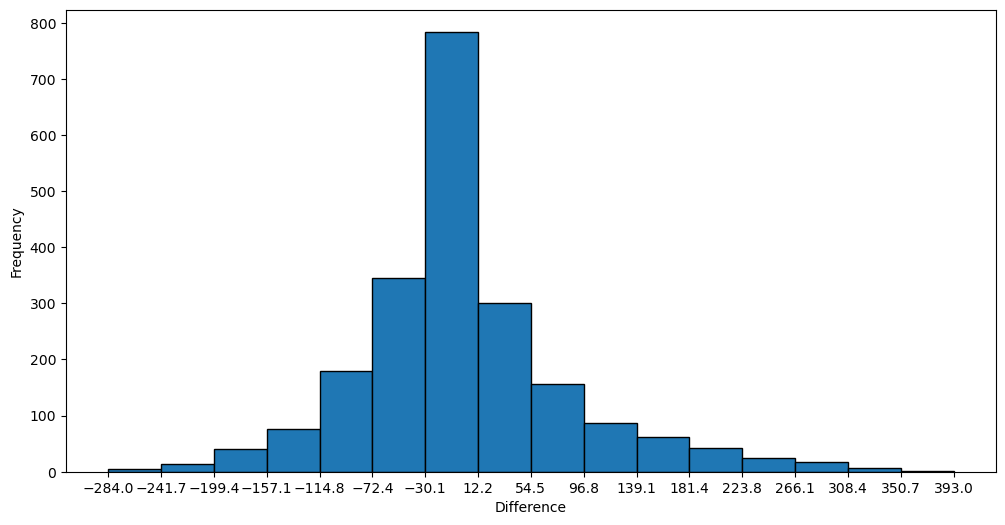

In [811]:
plt.figure(figsize=(12, 6))
actual_vs_pred_reg['difference'].plot(kind='hist', bins=16, edgecolor='black')
counts, bin_edges = np.histogram(actual_vs_pred_reg['difference'], bins=16)

plt.xticks(bin_edges)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

# Model Adjustment

In [923]:
# From The graph we will do manual adjustment
# Because it is better for our model to underpredict and overpredict
# It is better for our model to predict our sales will be 20, than 40. If the actually it is only 30.
# So we will make our model underpredict by adjusting the result

y_test_cas_predicted_adjusted = y_test_cas_predicted - 15
y_test_cas_predicted_adjusted [y_test_cas_predicted_adjusted<0] = 0

In [925]:
actual_vs_pred_cas_adjusted = pd.DataFrame({'actual_cas': y_test_cas, 'predicted_cas': y_test_cas_predicted_adjusted})
actual_vs_pred_cas_adjusted['difference'] = actual_vs_pred_cas_adjusted['actual_cas']-actual_vs_pred_cas_adjusted['predicted_cas']
actual_vs_pred_cas_adjusted

,actual_cas,predicted_cas,difference
11740,3,0.0,3.0
5892,10,0.0,10.0
6452,20,10.0,10.0
3908,4,0.0,4.0
10582,44,0.0,44.0
...,...,...,...
12139,35,0.0,35.0
7368,42,0.0,42.0
9328,3,0.0,3.0
6320,0,0.0,0.0


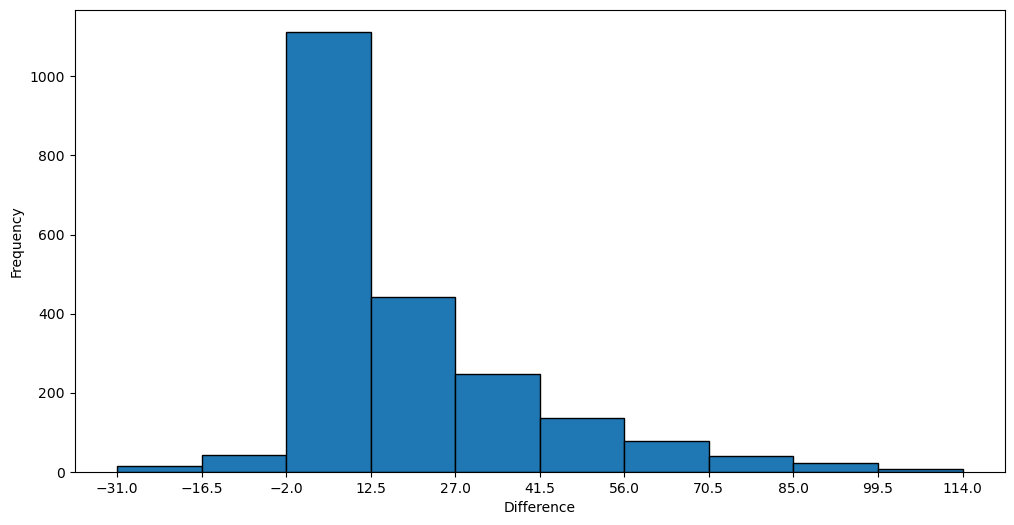

In [927]:
plt.figure(figsize=(12, 6))
actual_vs_pred_cas_adjusted['difference'].plot(kind='hist', bins=10, edgecolor='black')
counts, bin_edges = np.histogram(actual_vs_pred_cas_adjusted['difference'], bins=10)

plt.xticks(bin_edges)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

In [929]:
actual_vs_pred_cas_adjusted[actual_vs_pred_cas_adjusted['difference']>100]

,actual_cas,predicted_cas,difference
6198,109,5.0,104.0
266,113,0.0,113.0
8738,104,3.0,101.0
5648,115,7.0,108.0
11543,116,2.0,114.0
2326,115,11.0,104.0


In [941]:
#Now we will do the same for customer_reg

y_test_reg_predicted_adjusted = y_test_reg_predicted - 25
y_test_reg_predicted_adjusted [y_test_reg_predicted_adjusted<0] = 0

In [943]:
actual_vs_pred_reg_adjusted = pd.DataFrame({'actual_reg': y_test_reg, 'predicted_reg': y_test_reg_predicted_adjusted})
actual_vs_pred_reg_adjusted['difference'] = actual_vs_pred_reg_adjusted['actual_reg']-actual_vs_pred_reg_adjusted['predicted_reg']
actual_vs_pred_reg_adjusted

,actual_reg,predicted_reg,difference
11740,25,66.0,-41.0
5892,405,68.0,337.0
6452,148,104.0,44.0
3908,132,77.0,55.0
10582,161,209.0,-48.0
...,...,...,...
12139,161,207.0,-46.0
7368,125,93.0,32.0
9328,58,61.0,-3.0
6320,2,11.0,-9.0


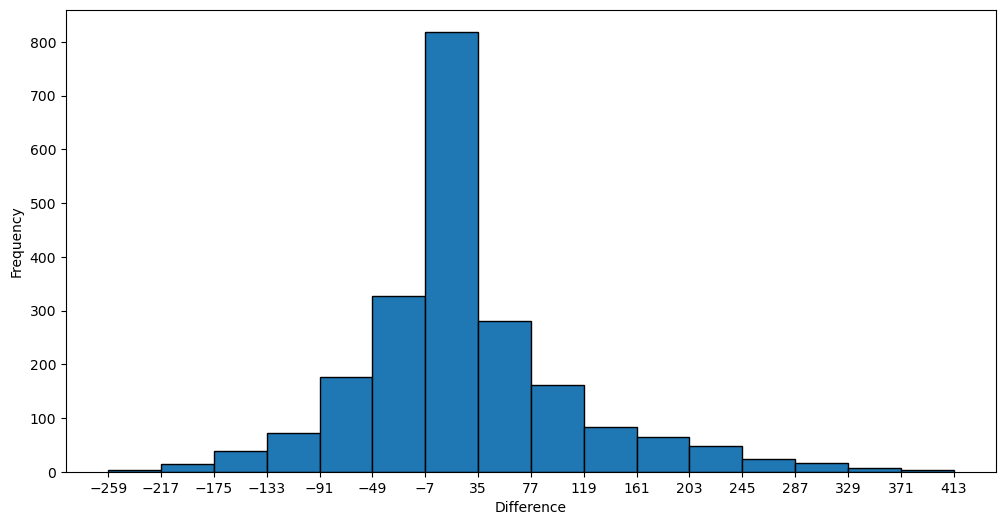

In [945]:
plt.figure(figsize=(12, 6))
actual_vs_pred_reg_adjusted['difference'].plot(kind='hist', bins=16, edgecolor='black')
counts, bin_edges = np.histogram(actual_vs_pred_reg_adjusted['difference'], bins=16)

plt.xticks(bin_edges)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

In [947]:
actual_vs_pred_reg_adjusted[actual_vs_pred_reg_adjusted['difference']>100]

,actual_reg,predicted_reg,difference
5892,405,68.0,337.0
7577,169,49.0,120.0
5420,208,60.0,148.0
4472,393,139.0,254.0
6730,213,57.0,156.0
...,...,...,...
7292,285,120.0,165.0
5686,147,31.0,116.0
4521,222,120.0,102.0
1862,333,92.0,241.0


In [939]:
# SO for casual we will substract by 15, for registered we will substract by 25

In [963]:
cas_prediction = Random_ForestR_cas.predict(X_test) - 15
cas_prediction[cas_prediction<0] = 0

reg_prediction = Random_ForestR_reg.predict(X_test) - 25
cas_prediction[cas_prediction<0] = 0

result = cas_prediction + reg_prediction
result = np.round(result, decimals=0)

In [965]:
result

array([ 66.,  68., 134., ...,  61.,  11., 209.])

In [979]:
import pickle

# After training your model, save it to a file
with open('casual.pkl', 'wb') as f:
    pickle.dump(Random_ForestR_cas, f)

with open('registered.pkl', 'wb') as f:
    pickle.dump(Random_ForestR_reg, f)

In [975]:
print(type(Random_ForestR_cas))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
